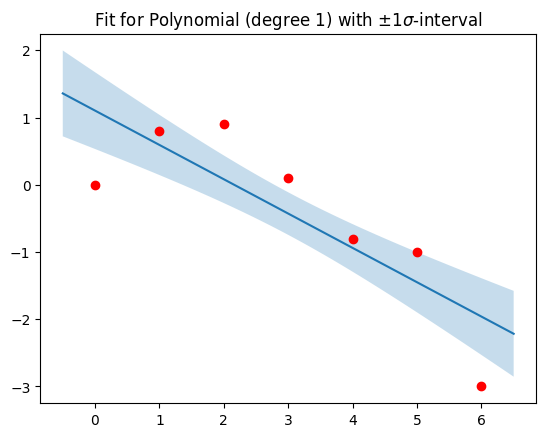

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# sample data:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0,  6.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0, -3.0])

n = 1  # degree of polynomial
p, C_p = np.polyfit(x, y, n, cov=True)  # C_z is estimated covariance matrix

# Do the interpolation for plotting:
t = np.linspace(-0.5, 6.5, 500)
# Matrix with rows 1, t, t**2, ...:
TT = np.vstack([t**(n-i) for i in range(n+1)]).T
yi = np.dot(TT, p)  # matrix multiplication calculates the polynomial values
C_yi = np.dot(TT, np.dot(C_p, TT.T)) # C_y = TT*C_z*TT.T
sig_yi = np.sqrt(np.diag(C_yi))  # Standard deviations are sqrt of diagonal

# Do the plotting:
fg, ax = plt.subplots(1, 1)
ax.set_title("Fit for Polynomial (degree {}) with $\pm1\sigma$-interval".format(n))
ax.fill_between(t, yi+sig_yi, yi-sig_yi, alpha=.25)
ax.plot(t, yi,'-')
ax.plot(x, y, 'ro')
ax.axis('tight')

fg.canvas.draw()
plt.show()